# ADP 24회 실기 문제

In [11]:
import numpy as np
import scipy.stats as stats

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

```{admonition} 1번
**데이터 확인 및 전처리**     
- 데이터 설명
    - 성별(sex) 바이너리 : 'F' - 여성 또는 'M' - 남성     
    - 나이(age) 숫자: 15 - 22     
    - 부모님동거여부 (Pstatus) 바이너리: T: 동거 또는 'A': 별거       
    - 엄마학력(Medu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육    
    - 아빠학력(Fedu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육   
    - 주보호자(guardian) 명목형 : '어머니', '아버지' 또는 '기타'     
    - 등하교시간(traveltime) 숫자 : 1 : 15분이하, 2 : 15 ~ 30분, 3 : 30분 ~ 1시간, 4 : 1시간 이상       
    - 학습시간(studytime) 숫자 : 1 : 2시간이하, 2 : 2~5시간, 3 : 5~10시간, 4 : 10시간이상    
    - 학고횟수(failures)  숫자 : 1, 2, 3 else 4     
    - 자유시간(freetime) 숫자 : 1(매우 낮음), 2, 3, 4, 5(매우 높음)   
    - 가족관계(famrel) 숫자 : 1(매우 나쁨), 2, 3, 4, 5(우수)    
```

In [291]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/24/problem1.csv')
df.head()

,sex,age,Pstatus,Fedu,Medu,guardian,studytime,traveltime,failures,famrel,freetime,absences
0,F,18.0,A,4,4,mother,2,2.0,0,4,3.0,6
1,F,17.0,T,1,1,father,2,1.0,0,5,3.0,4
2,F,15.0,T,1,1,mother,2,1.0,3,4,3.0,10
3,F,15.0,T,2,4,mother,3,1.0,0,3,2.0,2
4,F,NaN,T,3,3,father,2,1.0,0,4,3.0,4


## 1.1 데이터 EDA 및 시각화 

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         392 non-null    float64
 2   Pstatus     395 non-null    object 
 3   Fedu        395 non-null    int64  
 4   Medu        395 non-null    int64  
 5   guardian    395 non-null    object 
 6   studytime   395 non-null    int64  
 7   traveltime  392 non-null    float64
 8   failures    395 non-null    int64  
 9   famrel      395 non-null    int64  
 10  freetime    390 non-null    float64
 11  absences    395 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.2+ KB


In [337]:
cat_list = ['sex', 'Pstatus', 'guardian']
num_list = ['age', 'Fedu', 'Medu', 'studytime', 'traveltime', 'failures', 'freetime', 'famrel']
target = 'absences'

In [294]:
### failures (학고) 데이터의 경우 매우 일부 학생들만 받았으며, 대부분 학생들은 없음
# studytime과 traveltime은 분포가 매우 유사함. 상관관계 확인 필요
# famrel: 대부분 학생들은 가족관계가 매우 좋으나, 일부 안 좋은 케이스 있음
# 엄마보다는 아빠의 학력이 조금 더 높은 편
# age는 15세에서 21세 사이. 22세인 경우도 존재

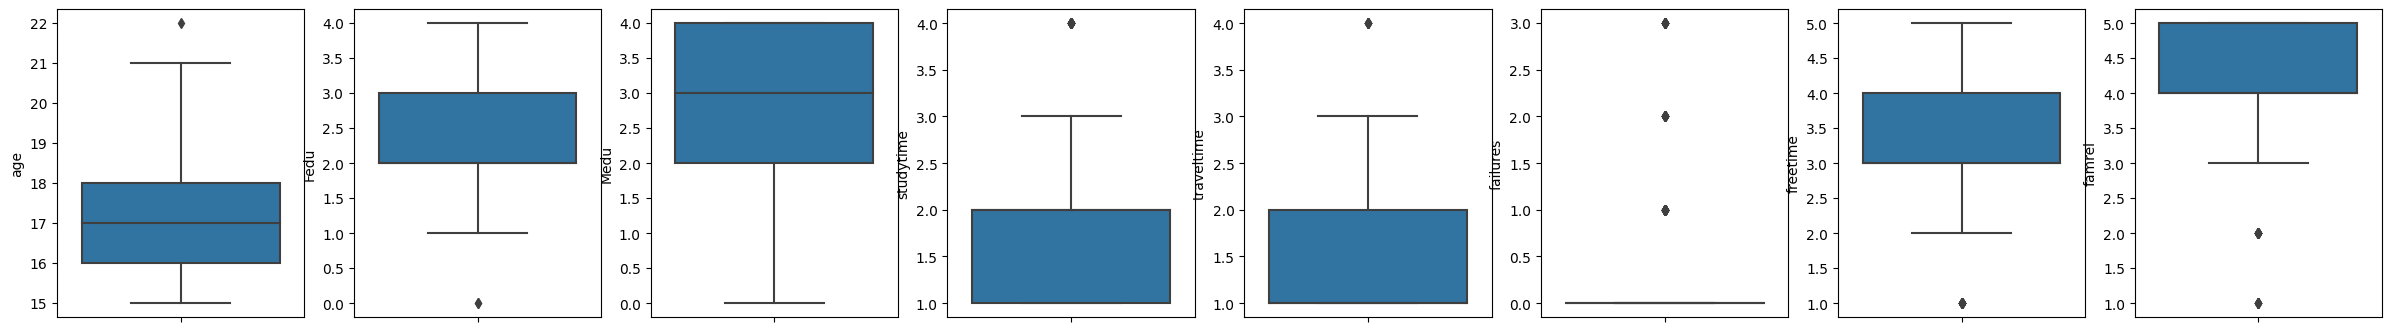

In [295]:
fig, axes = plt.subplots(ncols=len(num_list), figsize=(30, 4))
for i, col in enumerate(num_list):
    sns.boxplot(y=col, data=df, ax=axes[i])

In [296]:
# studytime과 traveltime의 상관관계 확인. 상관성은 높지 않음
df.loc[:, ['traveltime', 'studytime']].corr()

,traveltime,studytime
traveltime,1.000000,-0.098343
studytime,-0.098343,1.000000


In [297]:
# 성별은 비슷한 비율이고, 대부분 학생이 부모님과 함께 거주함. 주 보호자는 엄마의 비율이 높음

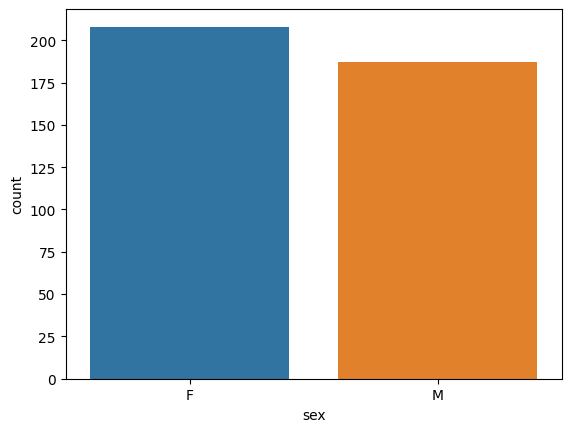

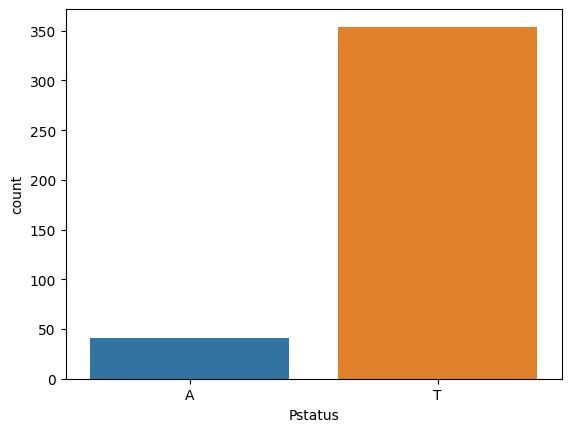

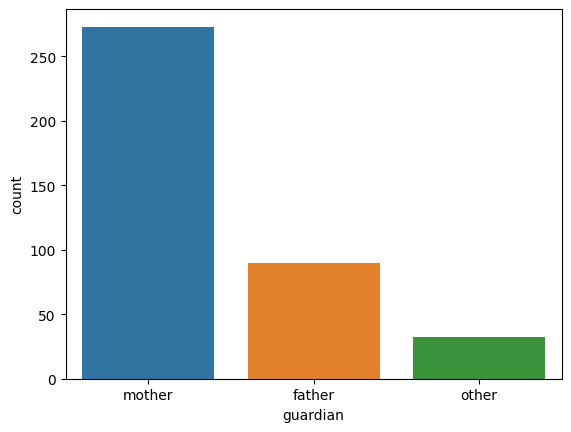

In [298]:
for col in cat_list:
    sns.countplot(x=df[col], data=df)
    plt.show()

## 1.2 결측치 처리 및 변화 시각화, 추가 전처리가 필요하다면 이유와 기대효과를 설명하라

In [299]:
df.info()
# age, traveltime, freetime 변수에 결측치가 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         392 non-null    float64
 2   Pstatus     395 non-null    object 
 3   Fedu        395 non-null    int64  
 4   Medu        395 non-null    int64  
 5   guardian    395 non-null    object 
 6   studytime   395 non-null    int64  
 7   traveltime  392 non-null    float64
 8   failures    395 non-null    int64  
 9   famrel      395 non-null    int64  
 10  freetime    390 non-null    float64
 11  absences    395 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.2+ KB


<Axes: >

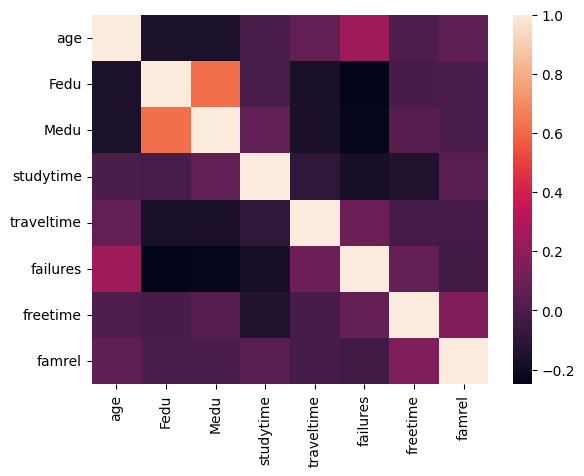

In [300]:
# 변수 간 상관관계가 거의 없어보임. 
sns.heatmap(df.loc[:, num_list].corr())

In [301]:
# age -> 예측 불가한 변수이고, 결측치가 많지 않으므로 삭제
df = df[df['age'].notna()]

In [302]:
from sklearn.impute import KNNImputer

In [303]:
### KNN Imputation
imputer = KNNImputer()

In [304]:
x = imputer.fit_transform(df.loc[:, num_list]) # fit and transform
imputed_df = pd.DataFrame(x, columns=num_list).reset_index()

In [305]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       392 non-null    int64  
 1   age         392 non-null    float64
 2   Fedu        392 non-null    float64
 3   Medu        392 non-null    float64
 4   studytime   392 non-null    float64
 5   traveltime  392 non-null    float64
 6   failures    392 non-null    float64
 7   freetime    392 non-null    float64
 8   famrel      392 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 27.7 KB


In [306]:
# freetime, traveltime -> KNNImputer 사용
df = df.drop(['traveltime', 'freetime'], axis=1).reset_index()
df = pd.concat([df, imputed_df.loc[:, ['traveltime', 'freetime']]], axis=1)

In [307]:
df.info() # 결측치 없음 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       392 non-null    int64  
 1   sex         392 non-null    object 
 2   age         392 non-null    float64
 3   Pstatus     392 non-null    object 
 4   Fedu        392 non-null    int64  
 5   Medu        392 non-null    int64  
 6   guardian    392 non-null    object 
 7   studytime   392 non-null    int64  
 8   failures    392 non-null    int64  
 9   famrel      392 non-null    int64  
 10  absences    392 non-null    int64  
 11  traveltime  392 non-null    float64
 12  freetime    392 non-null    float64
dtypes: float64(3), int64(7), object(3)
memory usage: 39.9+ KB


In [ ]:
# 학고횟수 데이터는 학고여부 데이터로 범주화: 이상치 감소 효과가 있음
# 척도 데이터들의 scale 조정 필요 -> MinMaxScaling 적용하여 같은 척도로 비교분석 할 수 있도록 함

In [308]:
df['failures_cat'] = np.where(df['failures'] > 0, 1, 0)

In [338]:
cat_list.append('failures_cat')

cat_list.remove('guardian')
cat_list.extend(['g_mother', 'g_father', 'g_other'])

In [316]:
num_list.remove('failures')

In [104]:
from sklearn.preprocessing import MinMaxScaler

In [318]:
scaler = MinMaxScaler()

In [319]:
scaled = scaler.fit_transform(df.loc[:, num_list].drop('age', axis=1))

In [320]:
df_scaled = pd.DataFrame(scaled, columns=num_list[1:])

In [321]:
df_scaled['age'] = df['age']

In [322]:
df = pd.concat([df_scaled, df.loc[:, cat_list + ['absences']]], axis=1)

In [323]:
df

,Fedu,Medu,studytime,traveltime,freetime,famrel,age,sex,Pstatus,guardian,failures_cat,absences
0,1.00,1.00,0.333333,0.333333,0.50,0.75,18.0,F,A,mother,0,6
1,0.25,0.25,0.333333,0.000000,0.50,1.00,17.0,F,T,father,0,4
2,0.25,0.25,0.333333,0.000000,0.50,0.75,15.0,F,T,mother,1,10
3,0.50,1.00,0.666667,0.000000,0.25,0.50,15.0,F,T,mother,0,2
4,0.75,1.00,0.333333,0.000000,0.75,1.00,16.0,M,T,mother,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
387,0.50,0.50,0.333333,0.000000,1.00,1.00,20.0,M,A,other,1,11
388,0.25,0.75,0.000000,0.333333,0.75,0.25,17.0,M,T,mother,0,3
389,0.25,0.25,0.000000,0.000000,1.00,1.00,21.0,M,T,other,1,3
390,0.50,0.75,0.000000,0.666667,0.75,0.75,18.0,M,T,mother,0,0


In [208]:
### Label encoding
from sklearn.preprocessing import LabelEncoder

In [324]:
encoder = LabelEncoder()

In [325]:
df['sex'] = encoder.fit_transform(df['sex']) # F=1, M=0
df['Pstatus'] = encoder.fit_transform(df['Pstatus']) # A=0, T=1

In [326]:
dummy_df = pd.get_dummies(df['guardian'])
for col in dummy_df.columns:
    dummy_df.loc[:, col] = np.where(dummy_df[col], 1, 0)

In [327]:
dummy_df.columns = ["g_father", "g_mother", "g_other"]

In [328]:
df = pd.concat([df, dummy_df], axis=1)

In [329]:
df = df.drop('guardian', axis=1)

In [330]:
df

,Fedu,Medu,studytime,traveltime,freetime,famrel,age,sex,Pstatus,failures_cat,absences,g_father,g_mother,g_other
0,1.00,1.00,0.333333,0.333333,0.50,0.75,18.0,0,0,0,6,0,1,0
1,0.25,0.25,0.333333,0.000000,0.50,1.00,17.0,0,1,0,4,1,0,0
2,0.25,0.25,0.333333,0.000000,0.50,0.75,15.0,0,1,1,10,0,1,0
3,0.50,1.00,0.666667,0.000000,0.25,0.50,15.0,0,1,0,2,0,1,0
4,0.75,1.00,0.333333,0.000000,0.75,1.00,16.0,1,1,0,10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0.50,0.50,0.333333,0.000000,1.00,1.00,20.0,1,0,1,11,0,0,1
388,0.25,0.75,0.000000,0.333333,0.75,0.25,17.0,1,1,0,3,0,1,0
389,0.25,0.25,0.000000,0.000000,1.00,1.00,21.0,1,1,1,3,0,0,1
390,0.50,0.75,0.000000,0.666667,0.75,0.75,18.0,1,1,0,0,0,1,0


In [331]:
df.columns

Index(['Fedu', 'Medu', 'studytime', 'traveltime', 'freetime', 'famrel', 'age',
       'sex', 'Pstatus', 'failures_cat', 'absences', 'g_father', 'g_mother',
       'g_other'],
      dtype='object')

In [332]:
num_list

['age', 'Fedu', 'Medu', 'studytime', 'traveltime', 'freetime', 'famrel']

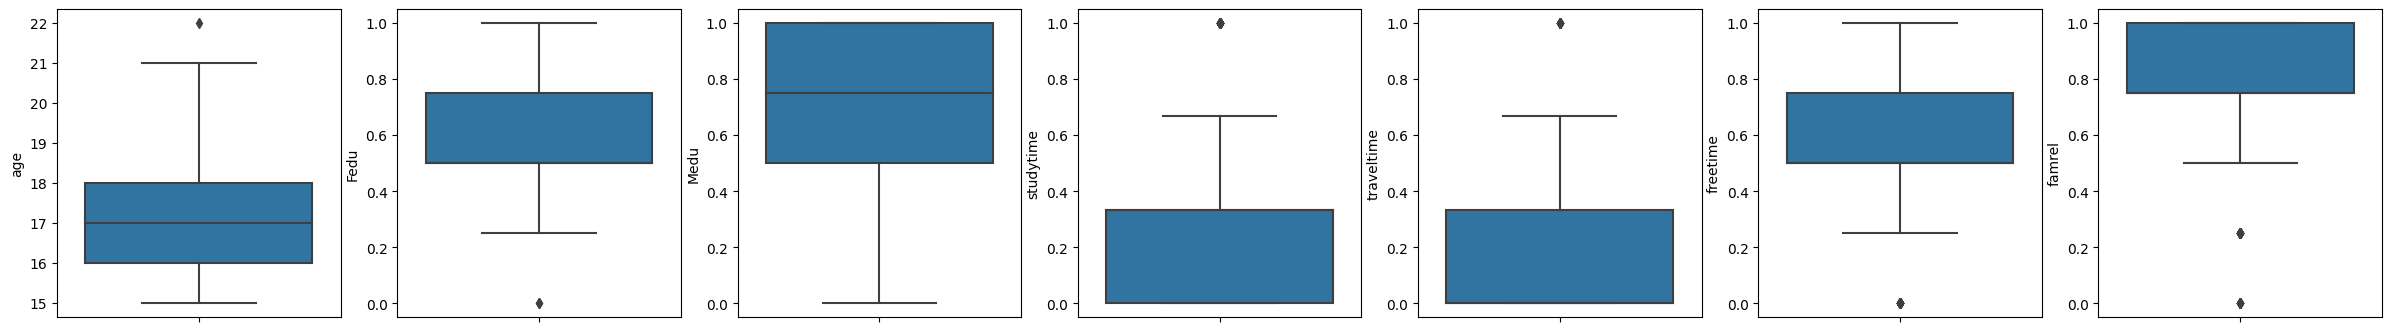

In [333]:
# 변수가 모두 정규화되어 있음이 확인됨
fig, axes = plt.subplots(ncols=len(num_list), figsize=(30, 4))
for i, col in enumerate(num_list):
    sns.boxplot(y=col, data=df, ax=axes[i])

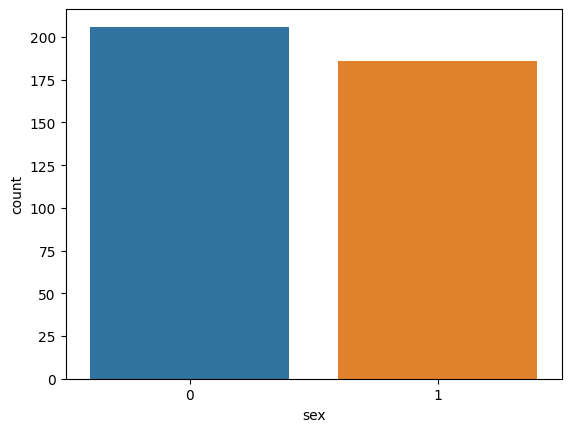

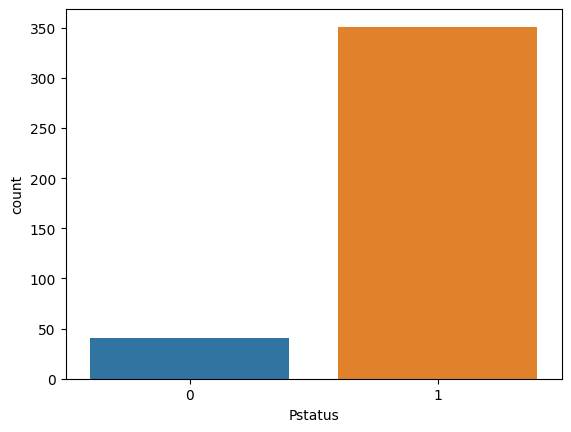

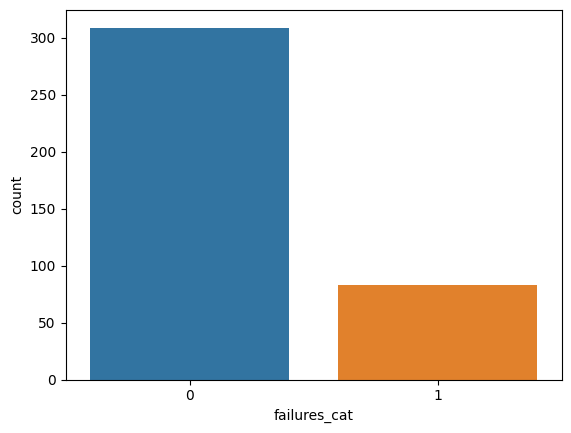

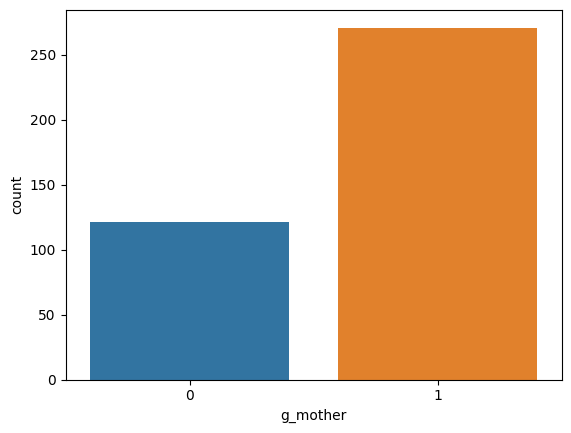

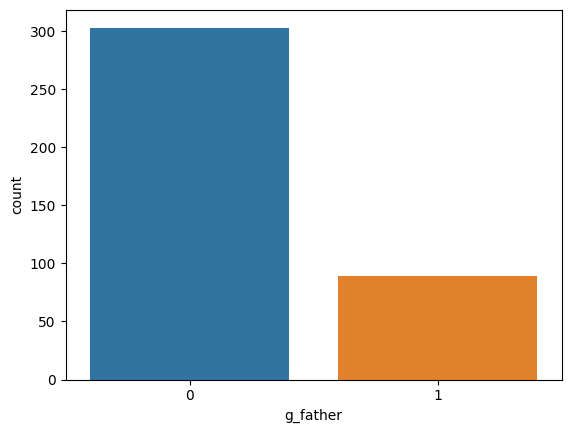

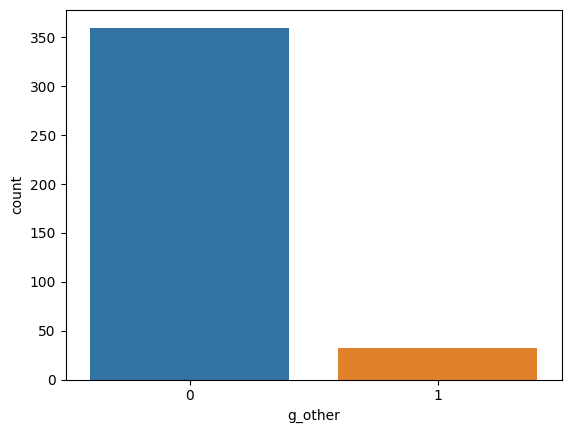

In [339]:
# 학고 변수가 categorical 변수로 변환됨
for col in cat_list:
    sns.countplot(x=df[col], data=df)
    plt.show()

<Axes: >

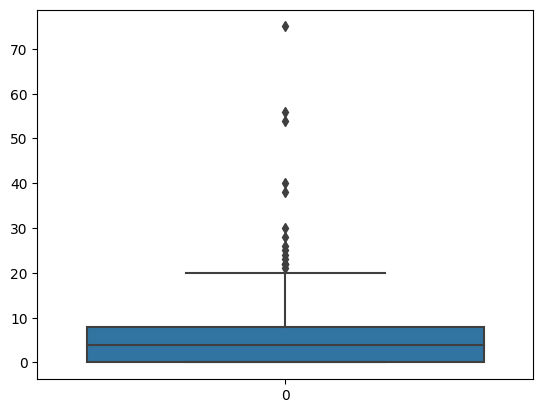

In [340]:
# y값 분포 확인. 변환 필요해 보임
sns.boxplot(df['absences'])

In [341]:
df['absences'].min()

0

In [342]:
df['absences_log'] = np.log1p(df['absences'])

In [343]:
df.drop('absences', axis=1, inplace=True)

<Axes: >

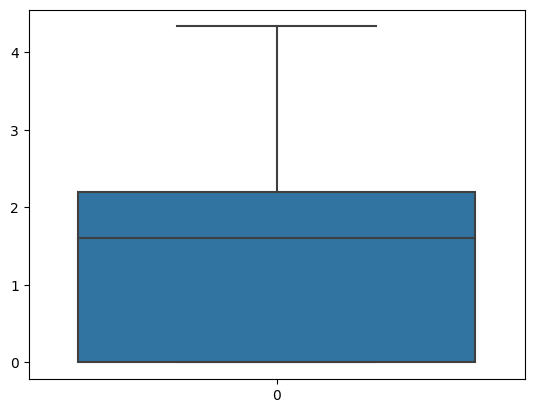

In [344]:
sns.boxplot(df['absences_log'])

In [345]:
df['absences_log'].skew()

0.07616304556493532

## 1.3 결석일수 예측모델을 2개 제시하고 선택한 근거 설명

In [ ]:
### 결석일수는 연속형 변수이므로 회귀 모형을 사용해야 함
# RandomForest와 LinearRegression
# 성능이 뛰어나고 모델 일반화에도 유리한 RandomForest와 모델 해석이 용이한 LinearRegression 사용

## 1.4 선정한 모델 2가지 생성 및 모델의 평가 기준을 선정하고 선정 이유 설명
- 평가 기준은 MSE와 R2-score 선정
- 한 가지는 모델의 오차를 파악, 다른 하나는 모델의 데이터 적합도를 파악하는 방법으로 상호 보완적

In [346]:
x = df.drop('absences_log', axis=1)
y = df['absences_log']

In [204]:
from sklearn.model_selection import train_test_split

In [347]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

In [203]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [348]:
rf = RandomForestRegressor()
rf.fit(train_x, train_y)

RandomForestRegressor()

In [349]:
rf_pred = rf.predict(test_x)

In [229]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

In [350]:
rf_mse = mean_squared_error(rf_pred, test_y)
rf_mse

1.2152990957656424

In [351]:
rf_r2 = r2_score(rf_pred, test_y)
rf_r2

-5.087502406410708

In [352]:
lr = LinearRegression()
lr.fit(train_x, train_y)

LinearRegression()

In [353]:
lr_pred = lr.predict(test_x)

In [354]:
lr_mse = mean_squared_error(lr_pred, test_y)
lr_mse

0.9954944313005808

In [355]:
lr_r2 = r2_score(lr_pred, test_y)
lr_r2

-12.127090482326688

## 1.5 모델이 다양한 일상 상황에서도 잘 동작한다는 것을 설명하고 시각화 하라
- 모델의 성능이 좋지 못하기 때문에, 현재 모델에서 일반화는 어려울 것으로 판단됨
- MDS와 PCA로 차원 축소를 통해 2차원으로 만든 x 변수들에 결석 일수를 색상으로 시각화해 보았더니, 결석일수가 거의 random으로 펼쳐져 있는 것을 확인할 수 있음
- 결석일수의 원인이 될 수 있는 다른 요인(독립변수)를 찾아봐야 함

<Axes: >

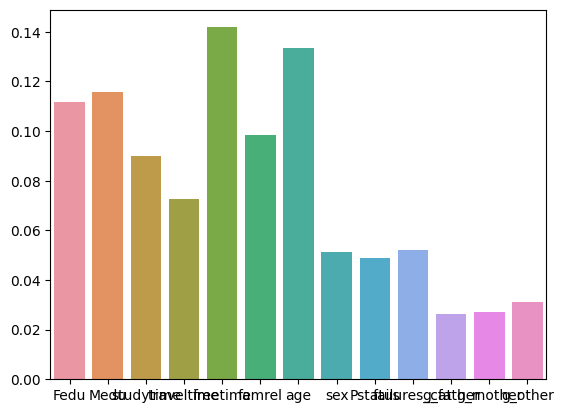

In [367]:
### Random forest 모델의 가장 높은 피쳐 중요도는 0.14정도로 높지 않은 것을 볼 수 있음
sns.barplot(x=x.columns, y=rf.feature_importances_)

<Axes: >

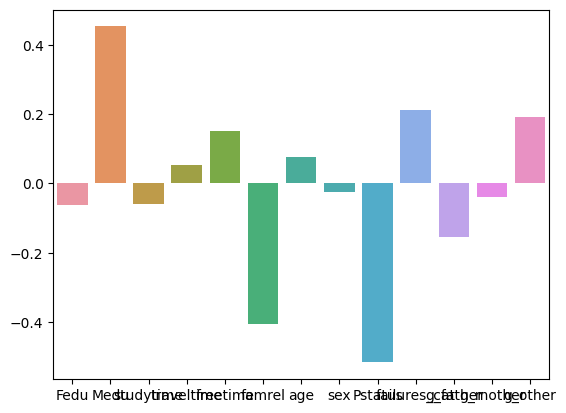

In [369]:
### 선형회귀의 coef_ 최대값도 0.21에 불과함
sns.barplot(x=x.columns, y=lr.coef_)

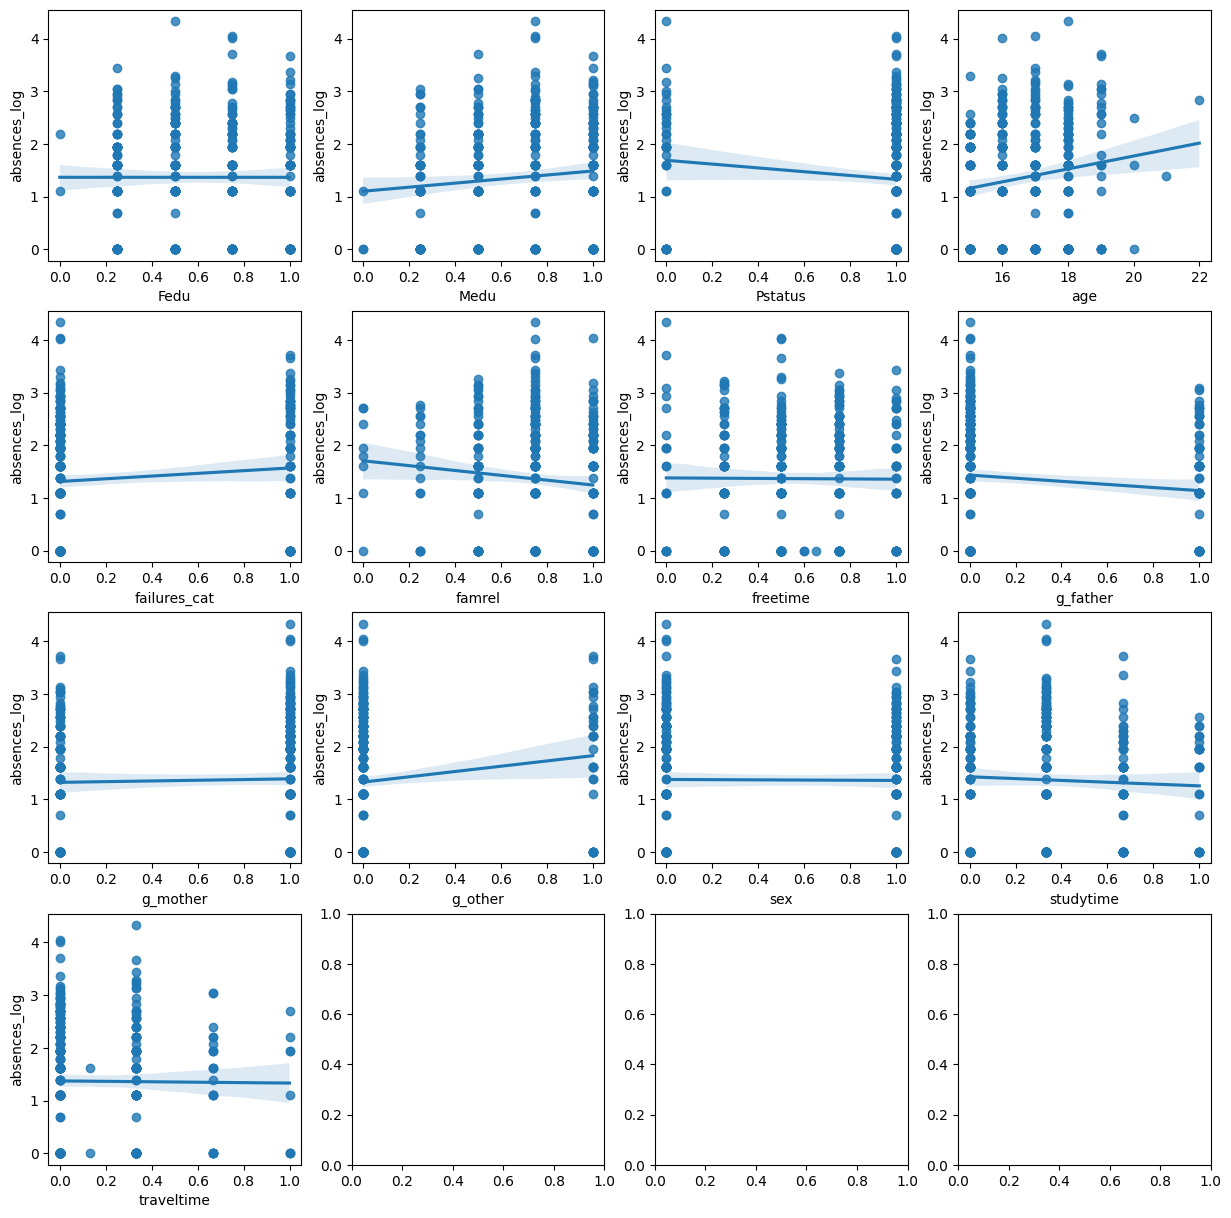

In [387]:
### 각 독립변수와 y(결석일수)의 회귀선을 그려보았으나, 거의 수평인 회귀선이 도출되었음
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
for i, col in enumerate(df.columns.difference(['absences_log'])):
    sns.regplot(x=col, y='absences_log', data=df, ax=axes[i//4, i%4])

In [372]:
abs(lr.coef_).max()

0.5163193011813567

In [ ]:
### 변수 시각화를 위해, 2차원으로 축소하는 MDS와 PCA 적용

In [356]:
from sklearn.manifold import MDS

In [357]:
mds = MDS(n_components=2, random_state=0)
x_reduced_mds = mds.fit_transform(x)

/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


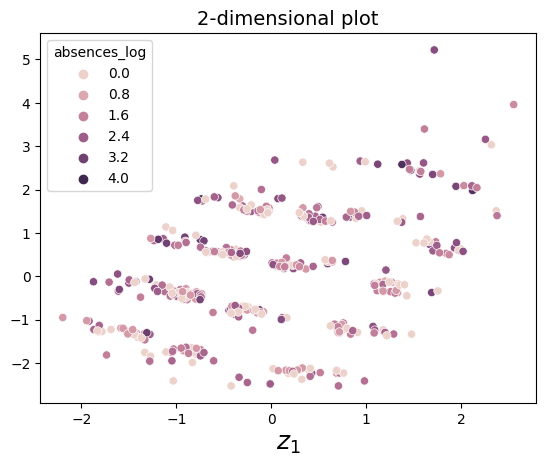

In [358]:
plt.title('2-dimensional plot', fontsize=14)
sns.scatterplot(x=x_reduced_mds[:, 0], y=x_reduced_mds[:, 1], hue=df['absences_log'])
plt.xlabel("$z_1$", fontsize=18)

plt.show()

In [269]:
from sklearn.decomposition import PCA

In [359]:
# 주성분 추출
pca = PCA(n_components=2)
pca_fit = pca.fit(x)

print("고유 값 : ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)

고유 값 :  [25.61897766 11.91389861]
분산 설명력:  [0.55793539 0.12066133]


In [360]:
PC1 = pca.fit_transform(x)[:,0]
PC2 = pca.fit_transform(x)[:,1]
ldngs = pca.components_

<Axes: >

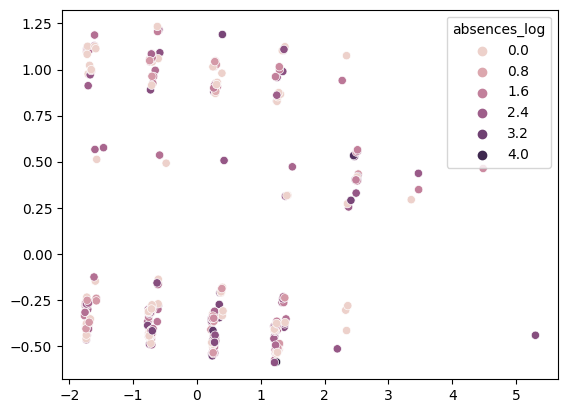

In [361]:
sns.scatterplot(x=PC1, y=PC2, hue=df['absences_log'])

## 1.6 모델 최적화 방안에 대해 구체적으로 설명하라

- GridSearch 등으로 하이퍼파라미터 탐색: 최적화된 파라미터로 조금 더 높은 성능을 기대해볼 수 있음
- 결석일수에 영향을 줄 만한 다른 변수를 추가하여 모델 설명력을 높여야 함
- 결석일수(y)에 이상치가 많은 형태이기 때문에, 결석일수를 정확하게 맞추는 회귀 모델보다는, 일정 수준 이상 결석 여부를 맞추는 분류 모델이 조금 더 효율적이고, 성능이 좋은 모델이 될 것

```{admonition} 2번
**광고횟수와 광고비에 따른 매출액의 데이터이다**     
```

In [24]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/24/problem2.csv',encoding='cp949')
df.head()

,광고횟수,광고비,매출액
0,2,낮음,15
1,3,낮음,16
2,4,낮음,17
3,4,높음,18
4,5,높음,20


## 2.1 광고비 변수를 가변수 처리후 다중회귀를 수행하여 회귀계수가 유의한지 검정
- 다중회귀 결과, 광고비 변수는 회귀계수가 유의하지 않는 것으로 판단됨

In [26]:
dummy_df = pd.get_dummies(df["광고비"], drop_first=True)
dummy_df["광고비_높음"] = np.where(dummy_df["높음"], 1, 0)

In [27]:
df = pd.concat([df, dummy_df], axis=1).drop(["광고비", "높음"], axis=1)

In [28]:
df

,광고횟수,매출액,광고비_높음
0,2,15,0
1,3,16,0
2,4,17,0
3,4,18,1
4,5,20,1
5,6,22,1
6,7,24,0
7,9,26,1
8,11,28,1
9,12,29,0


In [20]:
import statsmodels.formula.api as smf

In [29]:
lm = smf.ols("매출액 ~ 광고횟수 + 광고비_높음", data=df).fit()

In [30]:
lm.summary()

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출액   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     221.2
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           9.96e-08
Time:                        14:45:55   Log-Likelihood:                -11.883
No. Observations:                  11   AIC:                             29.77
Df Residuals:                       8   BIC:                             30.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1641      0.556     21.876      0.000      10.882      13.446
광고횟수           1.4350      0.074     19.518      0.000       1.265       1.605
광고비_높음         0.5227      0.536      0.975      0.358      -0.713       1.759
==============================================================================
Omnibus:                        7.665   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                3.407
Skew:                           1.265   Prob(JB):                        0.182
Kurtosis:                       4.015   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2.2 회귀식이 유의한지 판단
- 회귀식은 F-통계량 221.2, P-value 0.000으로 유의한 것으로 나타났음

```{admonition} 3번
**A생산라인의 제품 평균은 5.7mm이고 표준편차는 0.03, B생산라인의 제품 평균은 5.6mm이고 표준편차는 0.04라면 5%유의수준으로 두 제품의 평균이 차이가 있는지 여부를 검정하기 Z(0.05) = 1.65**
샘플 개수는 각 12개씩
```

## 3.1 귀무가설과 대립가설을 세워라

H0: 두 생산라인의 제품 길이 평균에는 차이가 없다. <br>
H1: 두 생산라인의 제품 길이 평균에는 차이가 있다.

## 3.2 두 평균이 차이가 있는지 검정하라

In [32]:
t = (5.7 - 5.6)/np.sqrt((0.03**2/12) + (0.03**2/12))
t

8.164965809277305

In [37]:
### P-value
(1 - stats.t.cdf(t, df=11))*2

5.377088852842604e-06

P-value 0.000으로 유의수준 0.05 하에서 귀무가설을 기각한다. 두 생산라인의 제품 길이 평균은 차이가 있다고 볼 수 있다.

## 4 바이러스 감염 분류표를 보고 베이지안 분류 방법을 사용해 양성으로 예측된 사람이 실제로 양성일 확률을 구하라

![image](https://github.com/Datamanim/datarepo/blob/main/adp/24/problem4.png?raw=true)

- P(실제 양성|양성 예측) = P(양성 예측|실제 양성)*P(양성 예측)/(P(음성 예측|실제 양성)*P(음성 예측) + P(양성 예측|실제 양성)*P(양성 예측))

- 양성 예측 중 실제 양성: 전체 양성 예측에서 실제 양성의 비율 

In [3]:
pred_po = (370 + 10)/((370 + 10) + (15 + 690))
pred_ne = (15 + 690)/((370 + 10) + (15 + 690))

pred_po_w_po = 370/(370 + 15)
pred_ne_w_po = 15/(370 + 15)
target = pred_po_w_po*pred_po/((pred_po_w_po*pred_po) + (pred_ne_w_po*pred_ne))
target

0.9300479576649578

```{admonition} 5번
**주어진 데이터에서 신뢰구간을 구하려한다**     
정규분포에서 표폰을 추출함[Z(0.05) = -1.65 , Z(0.025) = -1.96, T(0.05, 8) = 1.860 , T0.025(0.025, 8) = 2.306]       
데이터(9개) : [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3 4.4, 4.7]     
```

## 5.1 모분산을 모르는 경우 주어진 데이터의 95% 신뢰구간을 구하라

In [5]:
data = [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]

In [12]:
stats.norm.interval(confidence=0.95, loc=np.mean(data), scale=stats.sem(data))

(3.539431523586565, 4.238346254191212)

## 5.2 sigma = 0.04인걸 알고 있을때의 95% 신뢰구간을 구하라

In [14]:
se = 0.04/np.sqrt(len(data))
stats.t.interval(confidence=0.95, loc=np.mean(data), scale=se, df = len(data)-1)

(3.858142167088444, 3.9196356106893337)